<a href="https://colab.research.google.com/github/AryanGupta0419/PytorchTutorial/blob/main/DLLAB3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [ ]:

batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


100%|██████████| 170M/170M [00:05<00:00, 30.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
def train_model(optimizer_name, optimizer, model, criterion, num_epochs=10):
    model.to(device)
    train_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(trainloader)
        train_losses.append(train_loss)

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total
        test_accuracies.append(test_accuracy)

        print(f"{optimizer_name} - Epoch [{epoch+1}/{num_epochs}] Loss: {train_loss:.4f}, Test Acc: {test_accuracy:.2f}%")

    return train_losses, test_accuracies


In [ ]:
num_epochs = 5
criterion = nn.CrossEntropyLoss()

# SGD
model_sgd = CNN()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)
sgd_losses, sgd_acc = train_model("SGD", optimizer_sgd, model_sgd, criterion, num_epochs)

# Adam
model_adam = CNN()
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)
adam_losses, adam_acc = train_model("Adam", optimizer_adam, model_adam, criterion, num_epochs)

# RMSProp
model_rmsprop = CNN()
optimizer_rmsprop = optim.RMSprop(model_rmsprop.parameters(), lr=0.001, alpha=0.9)
rmsprop_losses, rmsprop_acc = train_model("RMSProp", optimizer_rmsprop, model_rmsprop, criterion, num_epochs)



SGD - Epoch [1/5] Loss: 1.8739, Test Acc: 45.50%
SGD - Epoch [2/5] Loss: 1.3706, Test Acc: 55.95%
SGD - Epoch [3/5] Loss: 1.1362, Test Acc: 62.91%
SGD - Epoch [4/5] Loss: 0.9584, Test Acc: 66.93%
SGD - Epoch [5/5] Loss: 0.8345, Test Acc: 71.36%
Adam - Epoch [1/5] Loss: 1.4643, Test Acc: 58.18%
Adam - Epoch [2/5] Loss: 1.0336, Test Acc: 66.11%
Adam - Epoch [3/5] Loss: 0.8520, Test Acc: 70.96%
Adam - Epoch [4/5] Loss: 0.7169, Test Acc: 72.66%
Adam - Epoch [5/5] Loss: 0.6184, Test Acc: 74.29%
RMSProp - Epoch [1/5] Loss: 1.5669, Test Acc: 52.51%
RMSProp - Epoch [2/5] Loss: 1.1238, Test Acc: 63.50%
RMSProp - Epoch [3/5] Loss: 0.9047, Test Acc: 67.82%
RMSProp - Epoch [4/5] Loss: 0.7571, Test Acc: 68.09%
RMSProp - Epoch [5/5] Loss: 0.6461, Test Acc: 73.11%


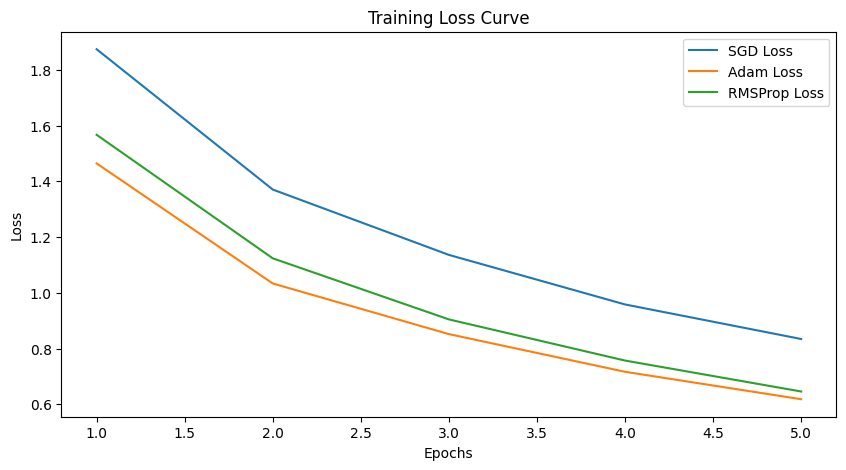

In [ ]:
# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), sgd_losses, label="SGD Loss")
plt.plot(range(1, num_epochs+1), adam_losses, label="Adam Loss")
plt.plot(range(1, num_epochs+1), rmsprop_losses, label="RMSProp Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()


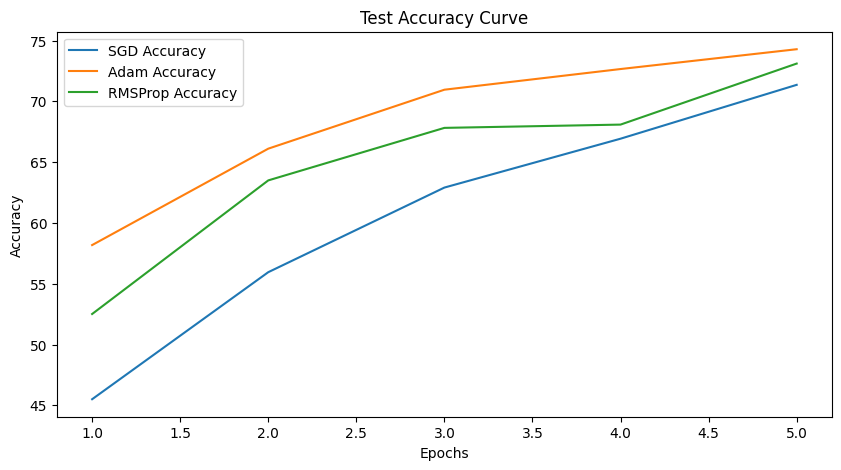

In [ ]:
# Plot Accuracy Curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), sgd_acc, label="SGD Accuracy")
plt.plot(range(1, num_epochs+1), adam_acc, label="Adam Accuracy")
plt.plot(range(1, num_epochs+1), rmsprop_acc, label="RMSProp Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Curve")
plt.legend()
plt.show()